### Import All The Necessary Libraries

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# plt.style.available


### Reading in CSV and checking Percentage missing data per column

In [2]:
df0=pd.read_csv(r"C:\Data Analytics\Python\Alex Python\Correlation Project\movies.csv")
df=df0.copy()
miss=(df.isna().sum()/df.shape[0]*100).round(2).astype(str) + '%'
miss


name          0.0%
rating        1.0%
genre         0.0%
year          0.0%
released     0.03%
score        0.04%
votes        0.04%
director      0.0%
writer       0.04%
star         0.01%
country      0.04%
budget      28.31%
gross        2.46%
company      0.22%
runtime      0.05%
dtype: object

## Dealing with Null Values:
### Data Cleaning:Filling all Object columns with the modal value

In [3]:
for col in df.select_dtypes('object').columns:
    mode_value=df[col].mode().iloc[0]
    df[col]=df[col].fillna(mode_value)

### Finding out the total missing values per numeric columns

In [4]:
df.select_dtypes(np.number).isna().sum()

year          0
score         3
votes         3
budget     2171
gross       189
runtime       4
dtype: int64

### Filling all numeric null values with the median value

In [61]:
for col in df.select_dtypes(np.number).columns:
    median_value=df[col].median()
    df[col]=df[col].fillna(median_value)

### Checking the dataframe for null values

In [62]:
df.isna().sum()

Name        0
Rating      0
Genre       0
Year        0
Released    0
Score       0
Votes       0
Director    0
Writer      0
Star        0
Country     0
Budget      0
Gross       0
Company     0
Runtime     0
dtype: int64

### Standardizing The column names to title case using list comprehension

In [128]:
df.columns=[col.title() for col in df.columns ]
df.head(1)

,Name,Rating,Genre,Year,Released,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146


### Check for Duplicates in dataframe

In [8]:
df.duplicated().sum()

0

### Confirm the columns datatype 

In [129]:
df.dtypes

Name         object
Rating       object
Genre        object
Year          int64
Released     object
Score       float64
Votes       float64
Director     object
Writer       object
Star         object
Country      object
Budget      float64
Gross       float64
Company      object
Runtime     float64
dtype: object

### Confirm the Shape of your dataframe

In [65]:
df.shape

(7668, 15)

### Sort by Gross Column

In [130]:
# Set display option to show float numbers in full
pd.set_option('display.float_format', '{:.5f}'.format)

sorted_df=df.sort_values('Gross', ascending=False).head(3) # sorting by Gross column descending

### Checking the Correlation between Budget and Gross with a Scatter plot

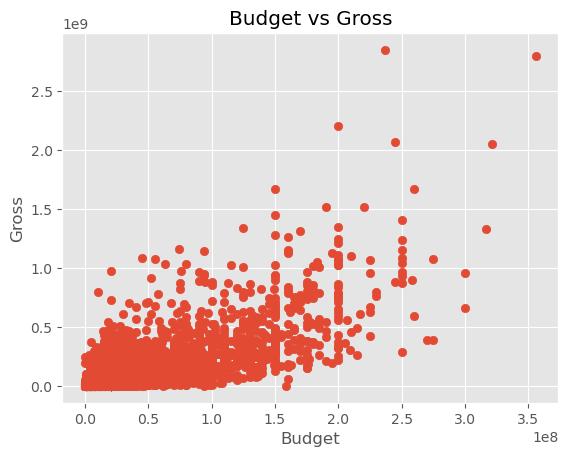

In [131]:
#Scatter plot with Budget vs Gross
plt.scatter(df['Budget'],df['Gross'])
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

### Plotting a regplot between Budget and Gross to determine the line of best fit

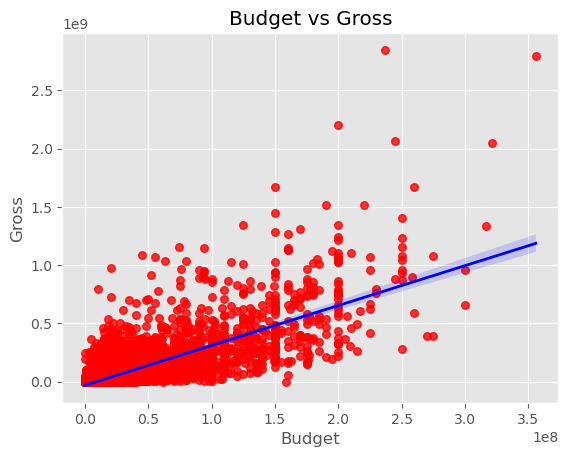

In [96]:
sns.regplot(x=df['Budget'],y=df['Gross'],line_kws={'color': 'blue', 'linewidth': 2},  # Customize regression line
scatter_kws={'color': 'red', 's': 30}) 
plt.title('Budget vs Gross')
plt.show()

### Looking at Correlation proper between the different variables

In [132]:
df2=df.select_dtypes(np.number)
df2.corr()
#Observation: There is a high correlation between the Budget and The Gross

,Year,Score,Votes,Budget,Gross,Runtime
Year,1.00000,0.09801,0.22257,0.29169,0.25950,0.12066
Score,0.09801,1.00000,0.40916,0.06193,0.18556,0.39941
Votes,0.22257,0.40916,1.00000,0.46097,0.63212,0.30915
Budget,0.29169,0.06193,0.46097,1.00000,0.74588,0.27337
Gross,0.25950,0.18556,0.63212,0.74588,1.00000,0.24438
Runtime,0.12066,0.39941,0.30915,0.27337,0.24438,1.00000


### Displaying the correlation matrix above as a heatmap

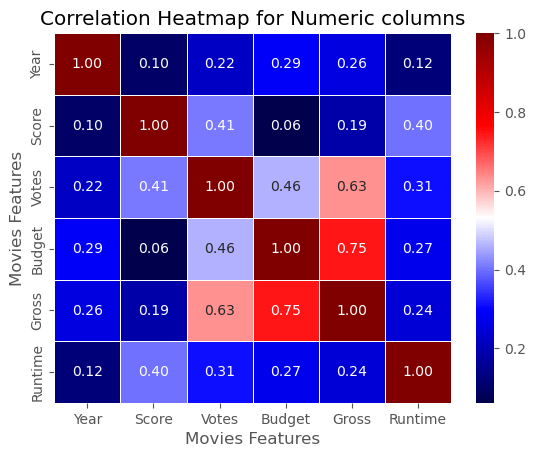

In [144]:
corr_matrix=df2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='seismic', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numeric columns')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')
plt.show()

## Label Encoding Object column
### Making a copy of the original dataframe for safety

In [166]:
df3=df.copy()

### Confirming the dataframe before converting to category datatype

In [167]:
df3.dtypes

Name         object
Rating       object
Genre        object
Year          int64
Released     object
Score       float64
Votes       float64
Director     object
Writer       object
Star         object
Country      object
Budget      float64
Gross       float64
Company      object
Runtime     float64
dtype: object

### Converting all object columns to category

In [168]:
for col in df3.select_dtypes('object').columns:
    df3[col]=df3[col].astype('category')



### Confirming our conversion to Category

In [169]:
df3.dtypes

Name        category
Rating      category
Genre       category
Year           int64
Released    category
Score        float64
Votes        float64
Director    category
Writer      category
Star        category
Country     category
Budget       float64
Gross        float64
Company     category
Runtime      float64
dtype: object

### Encoding all object columns using .cat.codes

In [170]:
for col in df3.select_dtypes('category').columns:
    df3[col+'_encoded_value']=df3[col].cat.codes

In [187]:
df3.head(2)

,Name,Rating,Genre,Year,Released,Score,Votes,Director,Writer,Star,...,Runtime,Name_encoded_value,Rating_encoded_value,Genre_encoded_value,Released_encoded_value,Director_encoded_value,Writer_encoded_value,Star_encoded_value,Country_encoded_value,Company_encoded_value
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40000,927000.00000,Stanley Kubrick,Stephen King,Jack Nicholson,...,146.00000,6587,6,6,1705,2589,4014,1047,54,2319
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80000,65000.00000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,...,104.00000,5573,6,1,1492,2269,1632,327,55,731


### Confirming all our columns and the respective datatype

In [172]:
df3.dtypes

Name                      category
Rating                    category
Genre                     category
Year                         int64
Released                  category
Score                      float64
Votes                      float64
Director                  category
Writer                    category
Star                      category
Country                   category
Budget                     float64
Gross                      float64
Company                   category
Runtime                    float64
Name_encoded_value           int16
Rating_encoded_value          int8
Genre_encoded_value           int8
Released_encoded_value       int16
Director_encoded_value       int16
Writer_encoded_value         int16
Star_encoded_value           int16
Country_encoded_value         int8
Company_encoded_value        int16
dtype: object

In [173]:
df4=df3.select_dtypes(np.number)

### Plotting our heatmap with the encoded data

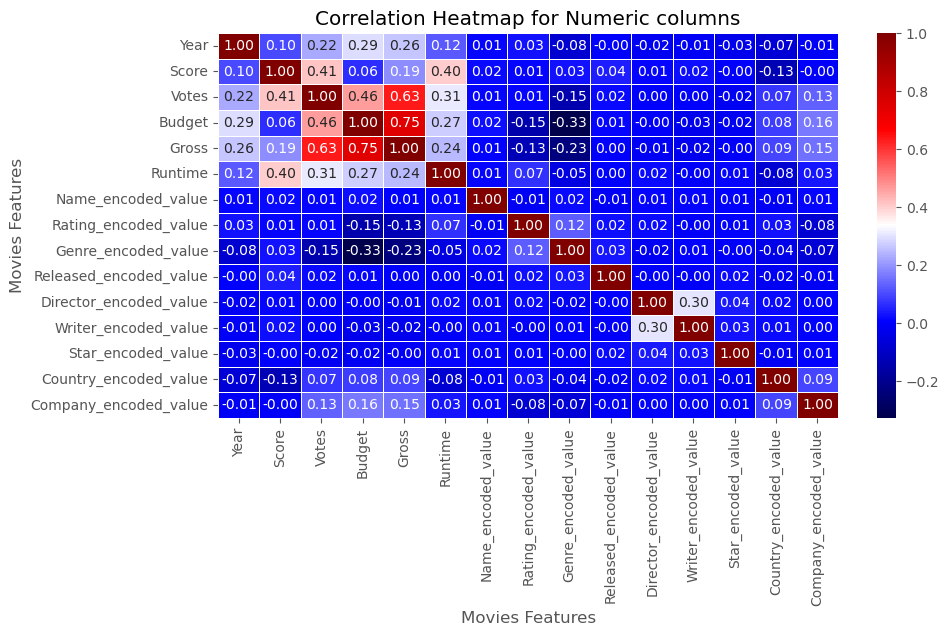

In [186]:
corr_mtrix=df4.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_mtrix, annot=True, cmap='seismic', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numeric columns')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')

plt.show()

In [188]:
df4.corr()

,Year,Score,Votes,Budget,Gross,Runtime,Name_encoded_value,Rating_encoded_value,Genre_encoded_value,Released_encoded_value,Director_encoded_value,Writer_encoded_value,Star_encoded_value,Country_encoded_value,Company_encoded_value
Year,1.00000,0.09801,0.22257,0.29169,0.25950,0.12066,0.01145,0.02793,-0.08126,-0.00048,-0.02080,-0.00790,-0.02774,-0.06942,-0.01144
Score,0.09801,1.00000,0.40916,0.06193,0.18556,0.39941,0.01711,0.01328,0.02796,0.04266,0.00954,0.01975,-0.00101,-0.13456,-0.00457
Votes,0.22257,0.40916,1.00000,0.46097,0.63212,0.30915,0.01306,0.01229,-0.14529,0.01598,0.00032,0.00038,-0.01937,0.07352,0.13056
Budget,0.29169,0.06193,0.46097,1.00000,0.74588,0.27337,0.02092,-0.14854,-0.32848,0.01105,-0.00358,-0.03105,-0.01881,0.08182,0.16421
Gross,0.25950,0.18556,0.63212,0.74588,1.00000,0.24438,0.00660,-0.13048,-0.23338,0.00072,-0.01476,-0.02303,-0.00164,0.09362,0.15335
Runtime,0.12066,0.39941,0.30915,0.27337,0.24438,1.00000,0.01033,0.06660,-0.05272,0.00095,0.01761,-0.00372,0.00925,-0.07930,0.03100
Name_encoded_value,0.01145,0.01711,0.01306,0.02092,0.00660,0.01033,1.00000,-0.01244,0.01635,-0.01109,0.00908,0.01002,0.00675,-0.01042,0.01037
Rating_encoded_value,0.02793,0.01328,0.01229,-0.14854,-0.13048,0.06660,-0.01244,1.00000,0.12347,0.02364,0.01625,-0.00279,0.00531,0.02693,-0.07963
Genre_encoded_value,-0.08126,0.02796,-0.14529,-0.32848,-0.23338,-0.05272,0.01635,0.12347,1.00000,0.03000,-0.01526,0.00675,-0.00486,-0.03590,-0.07001
Released_encoded_value,-0.00048,0.04266,0.01598,0.01105,0.00072,0.00095,-0.01109,0.02364,0.03000,1.00000,-0.00149,-0.00346,0.01555,-0.02204,-0.00844


### Unstaking the matrix for further Analysis and Transformation

In [193]:
pd.set_option('display.max.rows',None)
correl_matrix=df4.corr()
corr_pair=correl_matrix.unstack()
corr_pair

Year                    Year                      1.00000
                        Score                     0.09801
                        Votes                     0.22257
                        Budget                    0.29169
                        Gross                     0.25950
                        Runtime                   0.12066
                        Name_encoded_value        0.01145
                        Rating_encoded_value      0.02793
                        Genre_encoded_value      -0.08126
                        Released_encoded_value   -0.00048
                        Director_encoded_value   -0.02080
                        Writer_encoded_value     -0.00790
                        Star_encoded_value       -0.02774
                        Country_encoded_value    -0.06942
                        Company_encoded_value    -0.01144
Score                   Year                      0.09801
                        Score                     1.00000
              

### Sorting The columns

In [195]:
sorted_pairs=corr_pair.sort_values()
sorted_pairs

Genre_encoded_value     Budget                   -0.32848
Budget                  Genre_encoded_value      -0.32848
Genre_encoded_value     Gross                    -0.23338
Gross                   Genre_encoded_value      -0.23338
Budget                  Rating_encoded_value     -0.14854
Rating_encoded_value    Budget                   -0.14854
Genre_encoded_value     Votes                    -0.14529
Votes                   Genre_encoded_value      -0.14529
Country_encoded_value   Score                    -0.13456
Score                   Country_encoded_value    -0.13456
Rating_encoded_value    Gross                    -0.13048
Gross                   Rating_encoded_value     -0.13048
Genre_encoded_value     Year                     -0.08126
Year                    Genre_encoded_value      -0.08126
Rating_encoded_value    Company_encoded_value    -0.07963
Company_encoded_value   Rating_encoded_value     -0.07963
Country_encoded_value   Runtime                  -0.07930
Runtime       

### Filtering for correlation above 0.5

In [198]:
high_corr=sorted_pairs[(sorted_pairs.between(0.5,0.9))]
high_corr

Gross   Votes    0.63212
Votes   Gross    0.63212
Budget  Gross    0.74588
Gross   Budget   0.74588
dtype: float64

In [ ]:
# In conclusion we can conclude that the Budget and the votes has the highest correlation on The Gross In the movie Industry